In [1]:
import numpy as np
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
df_insurance = pd.read_sas('a2z_insurance.sas7bdat')
conn = sqlite3.connect('a2z_insurance.db')
cursor = conn.cursor()

# Build Analytical Base Table (ABT)
df_insurance.to_sql(name='file', con=conn, if_exists='replace', index=False)

In [3]:
#Overview of the dataset
df_insurance.head()

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
0,1.0,1985.0,1982.0,b'2 - High School',2177.0,1.0,1.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89
1,2.0,1981.0,1995.0,b'2 - High School',677.0,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13
2,3.0,1991.0,1970.0,b'1 - Basic',2277.0,3.0,0.0,504.67,0.28,206.15,224.50,124.58,86.35,99.02
3,4.0,1990.0,1981.0,b'3 - BSc/MSc',1099.0,4.0,1.0,-16.99,0.99,182.48,43.35,311.17,35.34,28.34
4,5.0,1986.0,1973.0,b'3 - BSc/MSc',1763.0,4.0,1.0,35.23,0.90,338.62,47.80,182.59,18.78,41.45


In [4]:
#Set id as index
df_insurance['CustID'] = df_insurance['CustID'].astype(int)
df_insurance.set_index(["CustID"],inplace=True)

In [5]:
#Get dimension of the dataset
df_insurance.shape

(10296, 13)

In [6]:
#Variables datatypes
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10296 entries, 1 to 10296
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FirstPolYear   10266 non-null  float64
 1   BirthYear      10279 non-null  float64
 2   EducDeg        10279 non-null  object 
 3   MonthSal       10260 non-null  float64
 4   GeoLivArea     10295 non-null  float64
 5   Children       10275 non-null  float64
 6   CustMonVal     10296 non-null  float64
 7   ClaimsRate     10296 non-null  float64
 8   PremMotor      10262 non-null  float64
 9   PremHousehold  10296 non-null  float64
 10  PremHealth     10253 non-null  float64
 11  PremLife       10192 non-null  float64
 12  PremWork       10210 non-null  float64
dtypes: float64(12), object(1)
memory usage: 1.1+ MB


In [7]:
#GeoLivArea and Children are categorical variables, 
#so we'll convert them into object
df_insurance = df_insurance.astype({"GeoLivArea": object, "Children": object})

In [8]:
#Count missing values
df_insurance.isna().sum()

FirstPolYear      30
BirthYear         17
EducDeg           17
MonthSal          36
GeoLivArea         1
Children          21
CustMonVal         0
ClaimsRate         0
PremMotor         34
PremHousehold      0
PremHealth        43
PremLife         104
PremWork          86
dtype: int64

In [9]:
df_insurance.dropna(inplace=True)

In [10]:
#Checking duplicates
df_insurance.duplicated().sum()

3

In [11]:
#Let's check what the duplicate rows are
df_insurance[df_insurance.duplicated(keep=False)]

,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
CustID,,,,,,,,,,,,,
2076,1977.0,1974.0,b'2 - High School',2204.0,4.0,1.0,-22.11,1.00,214.93,88.90,266.94,39.23,42.12
2100,1987.0,1987.0,b'2 - High School',1912.0,4.0,1.0,290.61,0.58,202.37,177.25,306.39,63.90,-0.11
3507,1986.0,1952.0,b'2 - High School',3900.0,4.0,0.0,-119.35,1.10,163.03,481.75,224.82,94.35,18.56
8014,1987.0,1987.0,b'2 - High School',1912.0,4.0,1.0,290.61,0.58,202.37,177.25,306.39,63.90,-0.11
8122,1977.0,1974.0,b'2 - High School',2204.0,4.0,1.0,-22.11,1.00,214.93,88.90,266.94,39.23,42.12
9554,1986.0,1952.0,b'2 - High School',3900.0,4.0,0.0,-119.35,1.10,163.03,481.75,224.82,94.35,18.56


It is extremely unlikely that there are exact duplicates, too many variables, probably an error.

In [12]:
# Frequencies of missing values across rows
df_insurance.isna().apply(lambda x:sum(x), axis=1).value_counts().sort_index()

0    9987
dtype: int64

In [13]:
df_insurance["FirstPolYear"]

CustID
1        1985.0
2        1981.0
3        1991.0
4        1990.0
5        1986.0
          ...  
10292    1984.0
10293    1977.0
10294    1994.0
10295    1981.0
10296    1990.0
Name: FirstPolYear, Length: 9987, dtype: float64

## 2.1) Visual Exploration

 Let's start with the dates <br>
 Years are not quantitive, so we need to group the dates

In [14]:
df_dates = df_insurance.copy()

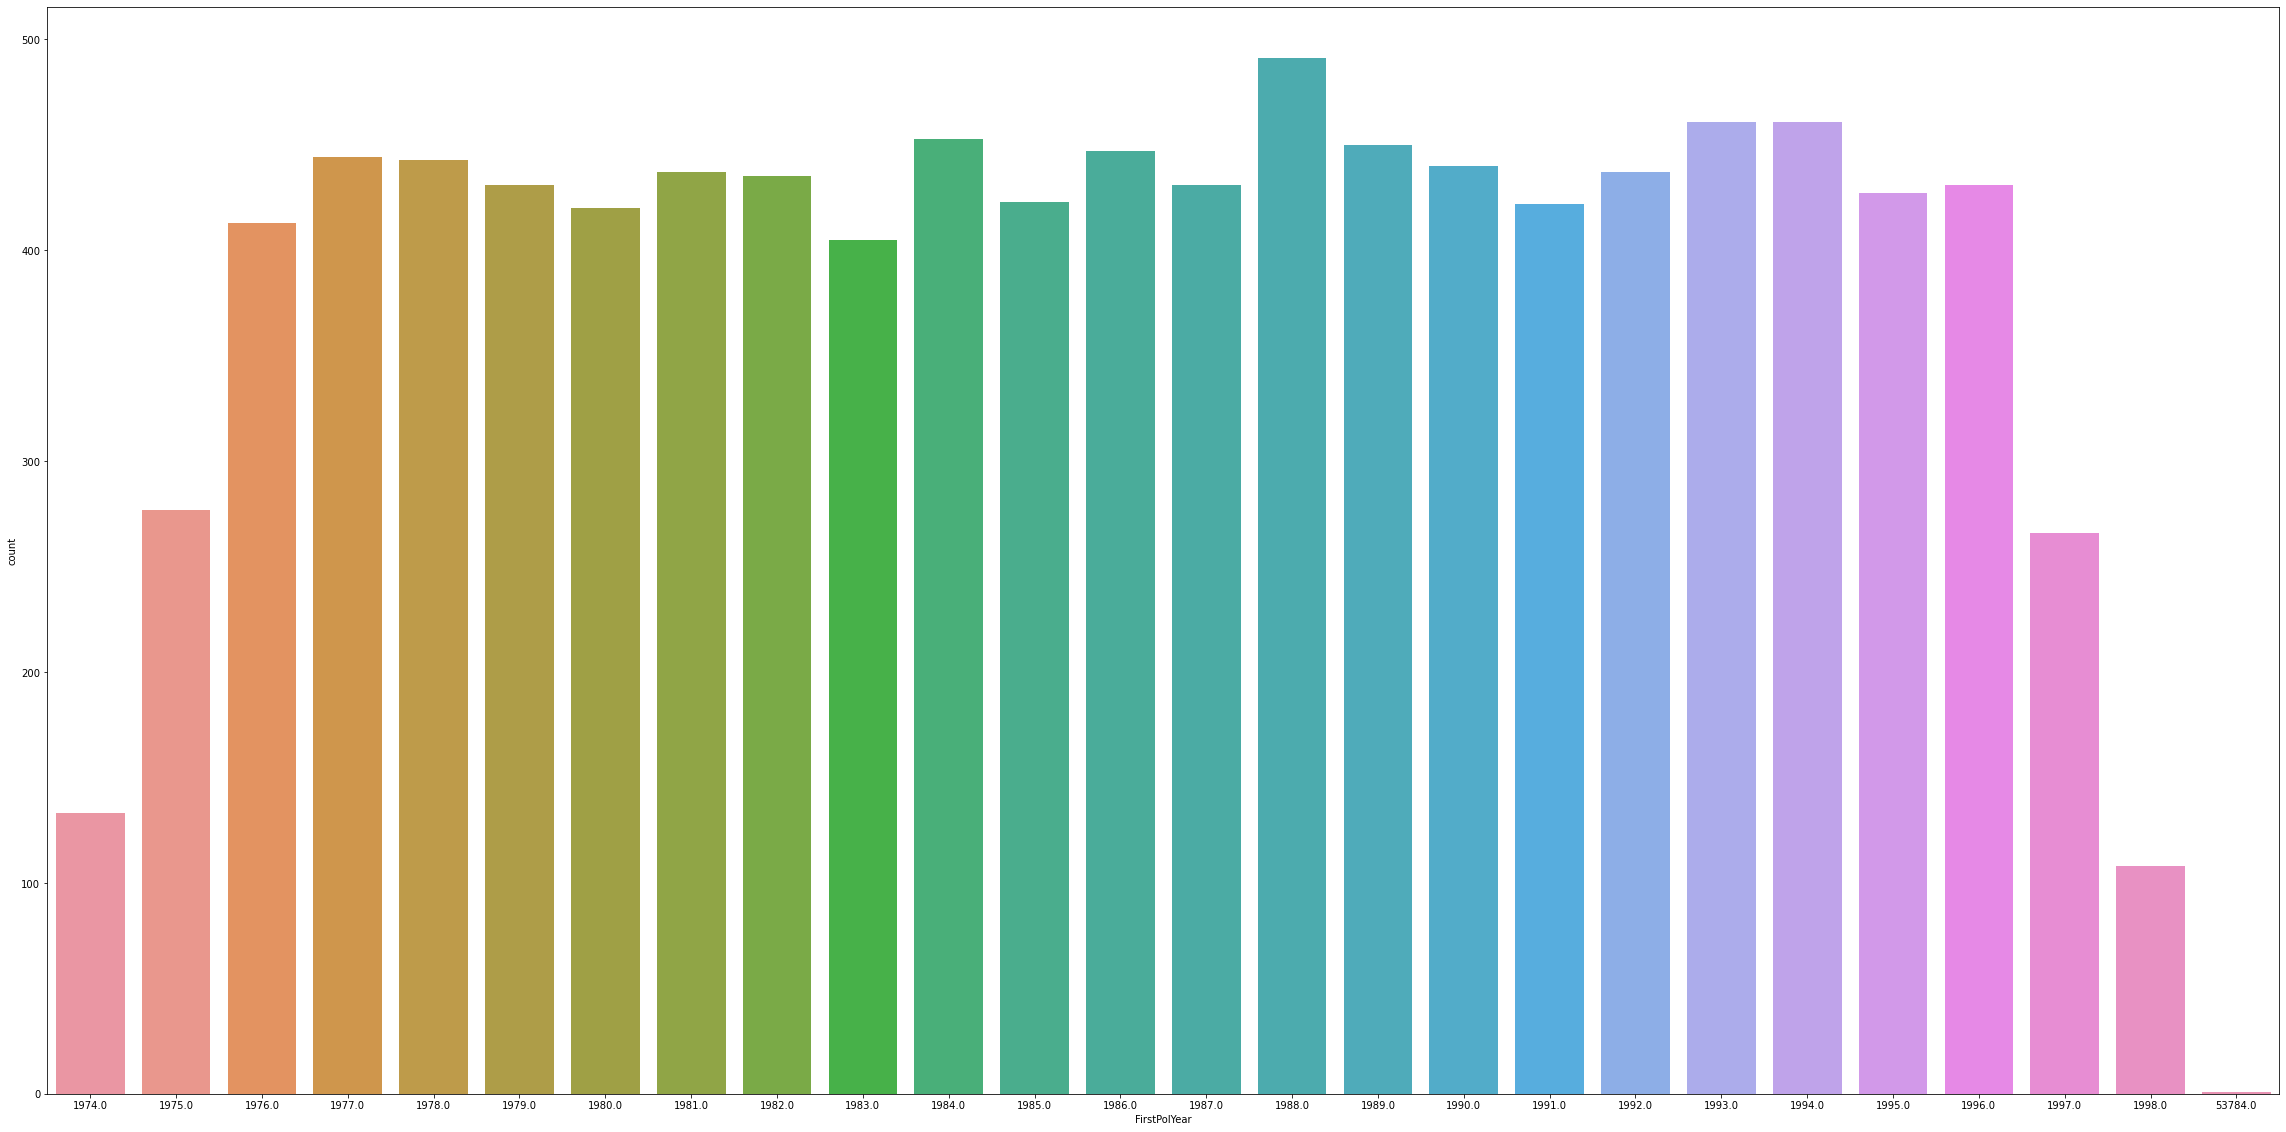

In [15]:
fig = plt.figure(figsize=(40,20))
ax = sns.countplot(x="FirstPolYear", data=df_insurance)

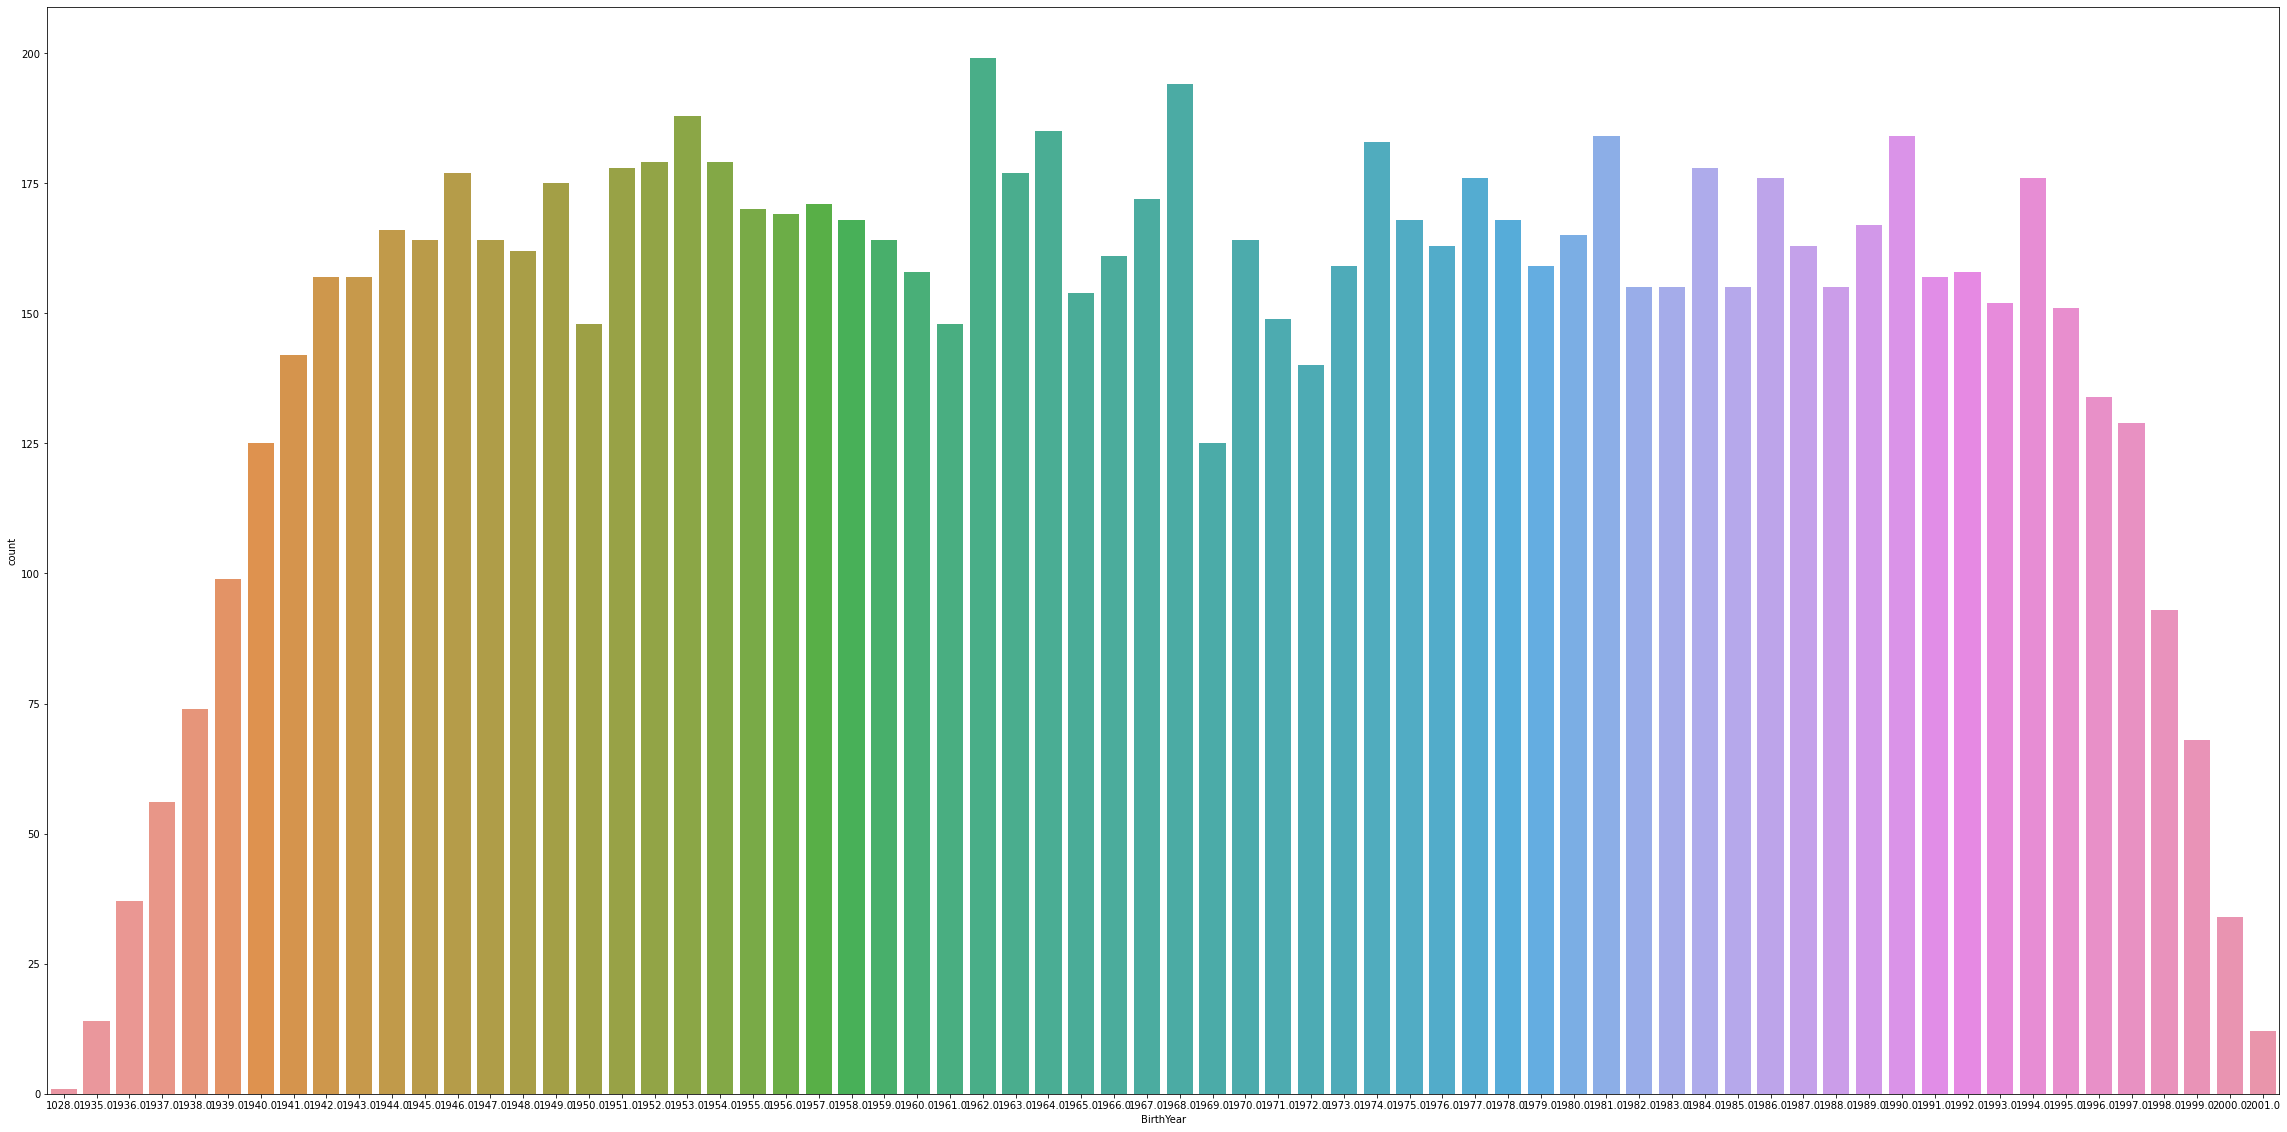

In [16]:
fig = plt.figure(figsize=(40,20))
ax = sns.countplot(x="BirthYear", data=df_insurance)

In [17]:
#Remove errors in our data, there can't be any dates in the future or before the country was founded
df_dates = df_insurance.loc[(df_insurance["BirthYear"] > 1143) & (df_insurance["FirstPolYear"] <= 2016)] 

In [18]:
#Group the dates into groups
df_dates.loc[:,"BirthYear"] = pd.cut(df_dates["BirthYear"], 4, labels = ["Very Old","Old","Adult","Young"])
df_dates.loc[:,"FirstPolYear"] = pd.cut(df_dates["FirstPolYear"], 4, labels = ["Very Old","Old","New","Very New"])

/Users/Beatriz/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


<AxesSubplot:xlabel='BirthYear', ylabel='count'>

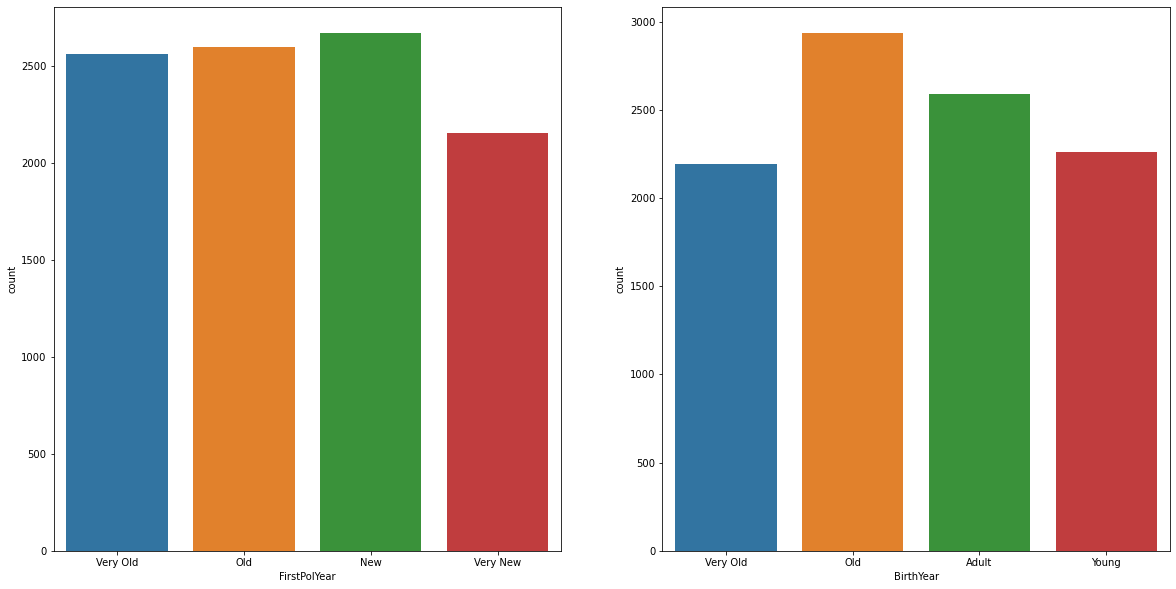

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
sns.countplot(x="FirstPolYear",data=df_dates,ax=ax1)
sns.countplot(x="BirthYear",data=df_dates,ax=ax2)

In [20]:
df_insurance = df_dates.copy()

In [21]:
# Define metric and non-metric datasets
non_metric_features = df_insurance.loc[:, ((np.array(df_insurance.dtypes=="category")| (np.array(df_insurance.dtypes=="object"))))].columns
metric_features = df_insurance.loc[:,(np.array(df_insurance.dtypes=="float64"))].columns


In [23]:
df_insurance[metric_features].head()

,MonthSal,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
CustID,,,,,,,,
1,2177.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89
2,677.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13
3,2277.0,504.67,0.28,206.15,224.50,124.58,86.35,99.02
4,1099.0,-16.99,0.99,182.48,43.35,311.17,35.34,28.34
5,1763.0,35.23,0.90,338.62,47.80,182.59,18.78,41.45


In [24]:
df_insurance[non_metric_features].head()

,FirstPolYear,BirthYear,EducDeg,GeoLivArea,Children
CustID,,,,,
1,Old,Adult,b'2 - High School',1.0,1.0
2,Old,Young,b'2 - High School',4.0,1.0
3,New,Adult,b'1 - Basic',3.0,0.0
4,New,Adult,b'3 - BSc/MSc',4.0,1.0
5,Old,Adult,b'3 - BSc/MSc',4.0,1.0


In [25]:
df_num = df_insurance[metric_features].copy()

In [26]:
df_num

,MonthSal,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
CustID,,,,,,,,
1,2177.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89
2,677.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13
3,2277.0,504.67,0.28,206.15,224.50,124.58,86.35,99.02
4,1099.0,-16.99,0.99,182.48,43.35,311.17,35.34,28.34
5,1763.0,35.23,0.90,338.62,47.80,182.59,18.78,41.45
...,...,...,...,...,...,...,...,...
10292,3188.0,-0.11,0.96,393.74,49.45,173.81,9.78,14.78
10293,2431.0,1405.60,0.00,133.58,1035.75,143.25,12.89,105.13
10294,2918.0,524.10,0.21,403.63,132.80,142.25,12.67,4.89


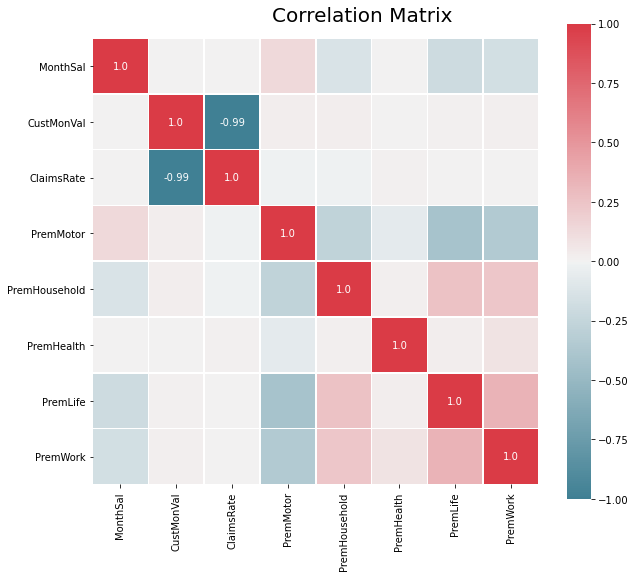

In [27]:
# Prepare figure
fig = plt.figure(figsize=(10, 8))

# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = np.round(df_num.corr(method="pearson"), decimals=2)

# Build annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape,"")) # Try to understand what this np.where() does

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
title = "Correlation Matrix"
fig.suptitle(title, fontsize=20)

plt.show()

It seems like CustMonVal and ClaimsRate have a direct relationship, therefore it is redundant to keep both.

In [28]:
df_insurance.drop(columns=["ClaimsRate"],inplace=True)
df_num.drop(columns=["ClaimsRate"],inplace=True)
metric_features = df_num.columns

In [29]:
df_num["PremTotal"] = df_num["PremMotor"] + df_num["PremHousehold"] + df_num["PremHealth"] + df_num["PremLife"] + df_num["PremWork"]


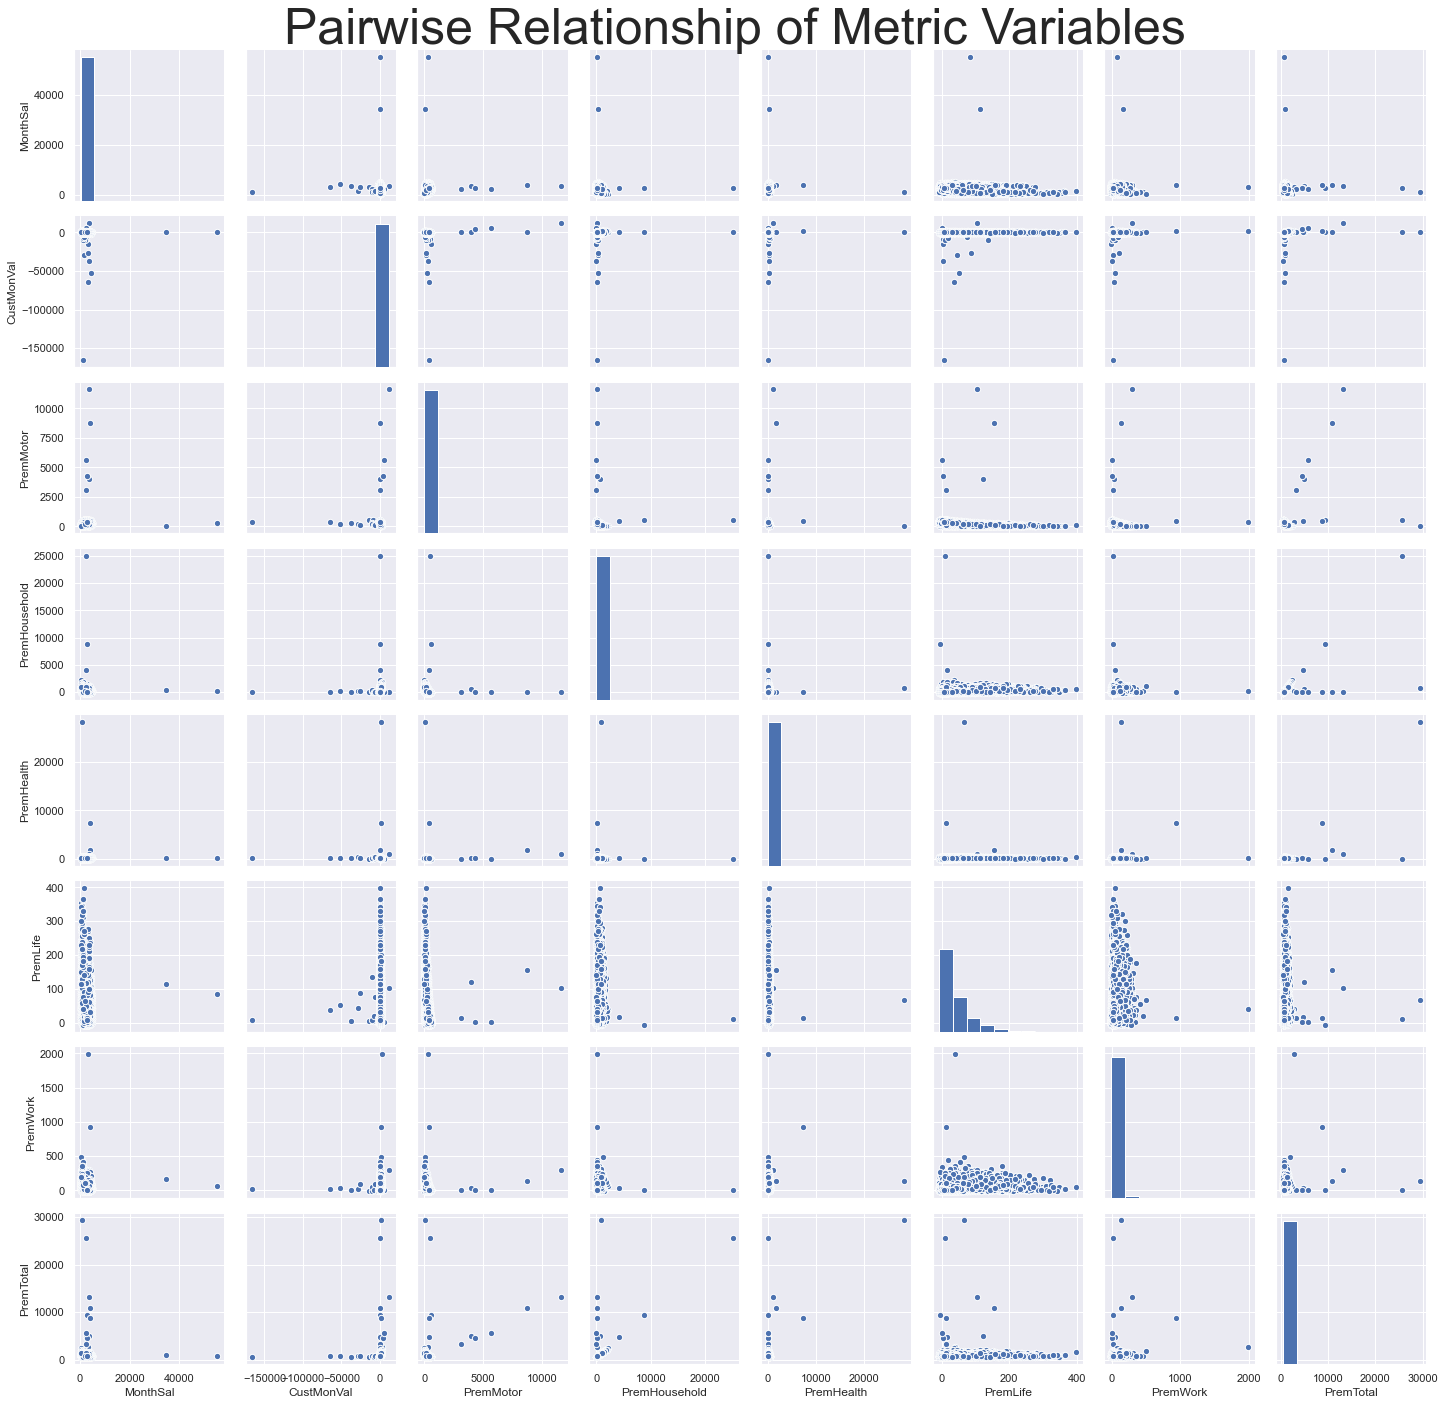

In [30]:
def pairwise(df_num):
    # Pairwise Relationship of Metric Variables in one figure
    sns.set()

    # Prepare figure
    # Set PairGrid:
    g = sns.PairGrid(df_num.dropna())

    # Plot data
    # Populating PairGrid:
    mdg = g.map_diag(plt.hist, edgecolor="w")
    mog = g.map_offdiag(plt.scatter, edgecolor="w", s=40)

    # Layout
    # Add a centered title to the figure:
    plt.subplots_adjust(top=0.95)
    title = "Pairwise Relationship of Metric Variables"
    plt.suptitle(title, fontsize=50)

    plt.show()

pairwise(df_num)

There are too many outliers for us to analyze the data properly, first we will need to remove them

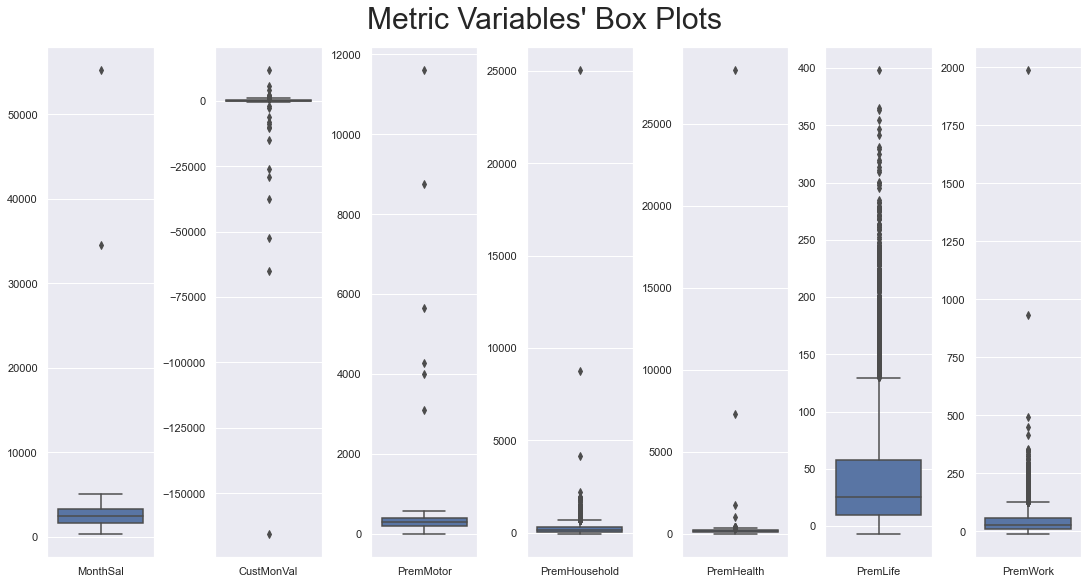

In [31]:
def boxplot(df_num):
    # All Metric Variables' Box Plots in one figure
    sns.set()

    # Prepare figure
    # Prepare dataframe layout:
    data = df_num.melt()
    plot_features = metric_features
    #Prepare figure layout:
    fig, axes = plt.subplots(1, len(plot_features), figsize=(15, 8), constrained_layout=True)

    # Plot data
    # Draw the box plots:
    for i in zip(axes, plot_features):
        sns.boxplot(x="variable", y="value", data=data.loc[data["variable"]==i[1]], ax=i[0])
        i[0].set_xlabel("")
        i[0].set_ylabel("")

    # Layout
    # Add a centered title to the figure:
    title = "Metric Variables' Box Plots"
    plt.suptitle(title, fontsize=30)

    plt.show()
    
boxplot(df_num)

In [32]:
filters = (
(df_num["MonthSal"] < 30000)
&
(df_num["CustMonVal"] > -75000)
&
(df_num["PremMotor"] < 2000)
&
(df_num["PremHousehold"] < 4000)
&
(df_num["PremHealth"] < 5000)
&
(df_num["PremWork"] < 750)
)
df_num_filtered = df_insurance[filters]
print("Percentage of data kept after removing outliers: ")
print(round(df_num_filtered.shape[0]/df_num.shape[0],4))

Percentage of data kept after removing outliers: 
0.9985


In [33]:
df_num_filtered["PremTotal"] = df_num_filtered["PremMotor"] + df_num_filtered["PremHousehold"] + df_num_filtered["PremHealth"] + df_num_filtered["PremLife"] + df_num_filtered["PremWork"]


<ipython-input-33-883243676ccd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num_filtered["PremTotal"] = df_num_filtered["PremMotor"] + df_num_filtered["PremHousehold"] + df_num_filtered["PremHealth"] + df_num_filtered["PremLife"] + df_num_filtered["PremWork"]


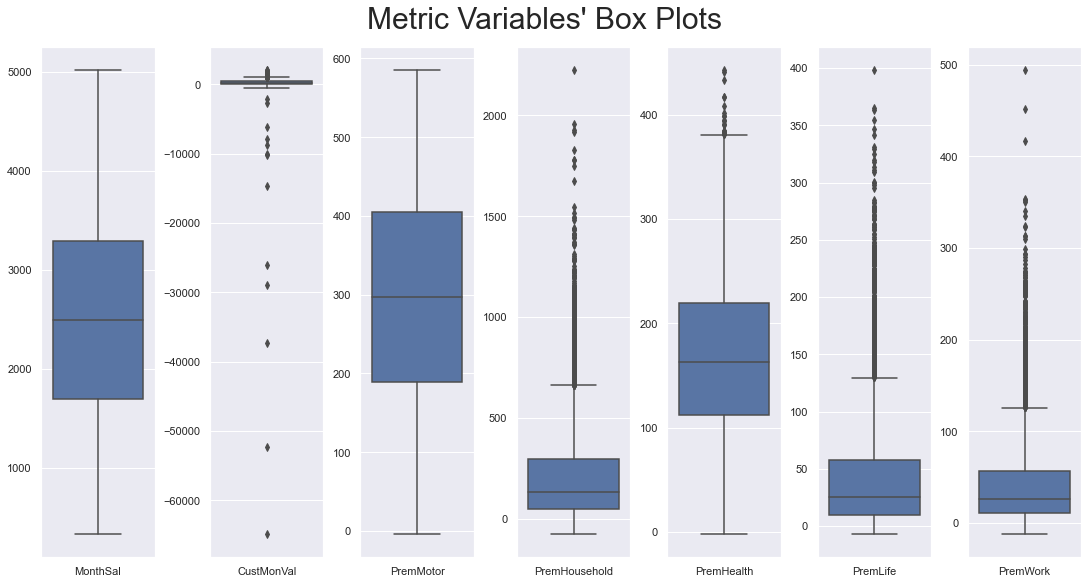

In [34]:
boxplot(df_num_filtered)

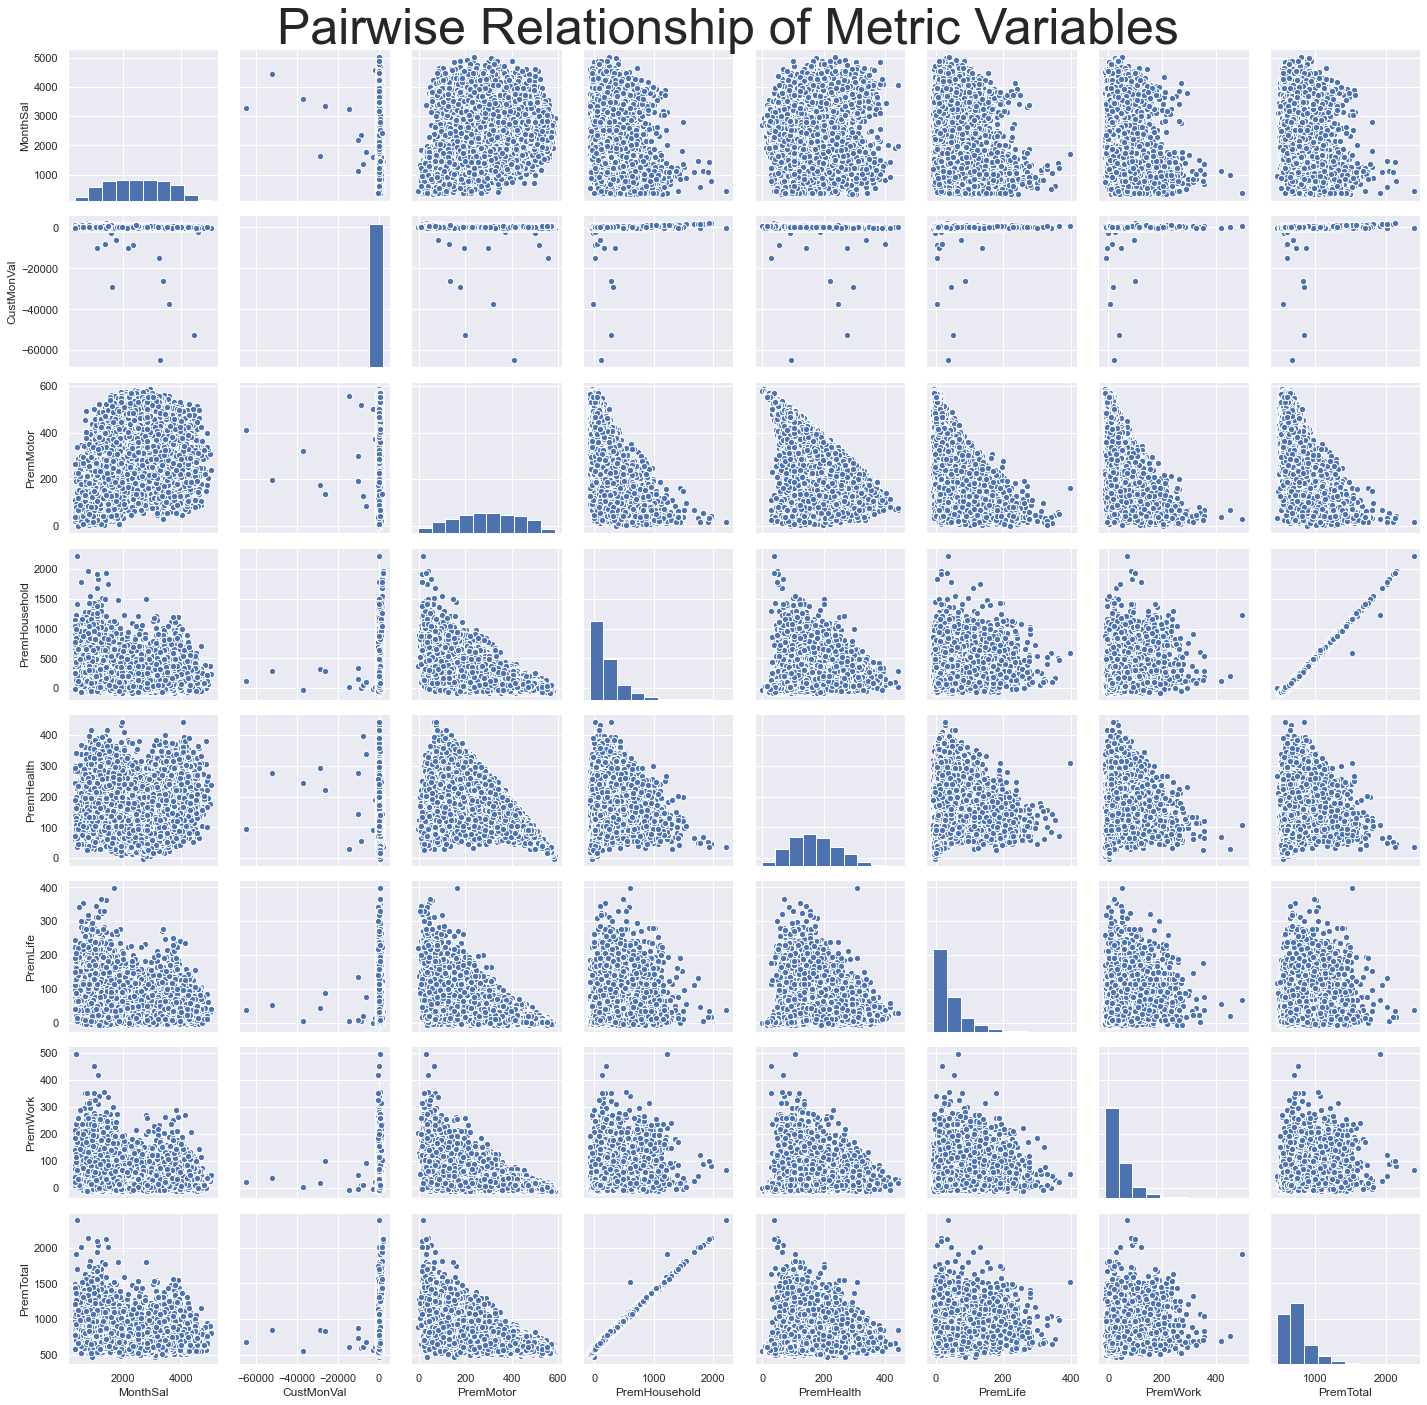

In [35]:
pairwise(df_num_filtered[df_num.columns])

Main things to point out:
- The PremTotal and PremHousehold have a linear relationship, since the values in PremHousehold are much bigger than all the other premiums. So PremTotal ~= PremHousehold. <br>
We will need to apply log10 to the columns.

## Clustering

In [36]:
df_insurance = df_num_filtered
df_insurance.drop(columns=["PremTotal"],inplace=True)

In [37]:
df_cluster = df_insurance.copy()

In [38]:
scaler = StandardScaler()
X_std = scaler.fit_transform(df_cluster[metric_features])
df_cluster[metric_features] = X_std

In [39]:
df_cluster.head()

,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
CustID,,,,,,,,,,,,
1,Old,Adult,b'2 - High School',-0.323887,1.0,1.0,0.177948,0.584740,-0.547664,-0.299951,0.105164,-0.516693
2,Old,Young,b'2 - High School',-1.843227,4.0,1.0,-0.303939,-1.582090,0.872967,-0.700036,3.202116,1.381391
3,New,Adult,b'1 - Basic',-0.222598,3.0,0.0,0.294350,-0.647577,0.064252,-0.593643,0.931326,1.230166
4,New,Adult,b'3 - BSc/MSc',-1.415786,4.0,1.0,-0.196533,-0.819462,-0.699957,1.922428,-0.139912,-0.273158
5,Old,Adult,b'3 - BSc/MSc',-0.743225,4.0,1.0,-0.147394,0.314386,-0.681184,0.188592,-0.487681,0.005684


In [40]:
df_cluster["PremTotal"] = df_cluster["PremMotor"] + df_cluster["PremHousehold"]  + df_cluster["PremHealth"] + df_cluster["PremLife"] + df_cluster["PremWork"]
df_cluster.drop(columns=["PremMotor","PremHousehold","PremHealth","PremLife","PremWork"],inplace=True)

In [41]:
df_metric = df_cluster[["MonthSal","CustMonVal","PremTotal"]]

In [42]:
# create initial K-means model
kmeans_model = KMeans(init='k-means++', 
                      max_iter=500, 
                      random_state=42)

In [43]:
kmeans_model.fit(df_metric)
print("within-cluster sum-of-squares (inertia) of the model is:", kmeans_model.inertia_)

within-cluster sum-of-squares (inertia) of the model is: 6773.055921924419


Add cluster centers

In [44]:
cluster_centers = kmeans_model.cluster_centers_
actual_data = np.expm1(cluster_centers)
add_points = np.append(actual_data, cluster_centers, axis=1)
add_points

array([[ 2.90046287e-02,  6.10097186e-03, -8.50523698e-01,
         2.85919551e-02,  6.08243629e-03, -1.90061741e+00],
       [-6.22237498e-01,  1.92043139e-02,  2.41626264e+00,
        -9.73489583e-01,  1.90222384e-02,  1.22854716e+00],
       [ 1.75579308e+00,  3.81488023e-03, -4.15214883e-01,
         1.01370527e+00,  3.80762203e-03, -5.36510821e-01],
       [ 2.96606224e+00, -1.00000000e+00,  7.63518219e-02,
         1.37777372e+00, -5.53579629e+01,  7.35773803e-02],
       [ 1.83188307e+00,  4.29165471e-02,  2.63642372e+00,
         1.04094189e+00,  4.20211604e-02,  1.29100070e+00],
       [-4.91103195e-01, -6.08133518e-03, -3.71579740e-01,
        -6.75510023e-01, -6.09990181e-03, -4.64546132e-01],
       [ 5.81414505e-01, -1.00000000e+00, -2.29922995e-01,
         4.58319703e-01, -2.53798739e+01, -2.61264762e-01],
       [-7.51245208e-01,  1.32847691e-01,  2.64473021e+01,
        -1.39128764e+00,  1.24734543e-01,  3.31226788e+00]])

In [45]:
add_points = np.append(add_points, [[0],[1],[2],[3],[4],[5],[6],[7]], axis=1)
df_metric["clusters"] = kmeans_model.labels_

<ipython-input-45-a58ef45632f5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metric["clusters"] = kmeans_model.labels_
